# Deutsch Algorithm

In [1]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister

In [2]:
def cplot(circuit):
    return circuit.draw('mpl', scale=0.7, initial_state= True)
 
from qiskit.quantum_info import Statevector
def splot(state):
    return Statevector(state).draw('latex') 

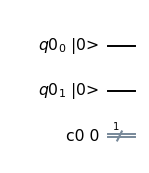

<IPython.core.display.Latex object>

In [3]:
q = QuantumRegister(2)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
display(cplot(qc),splot(qc))

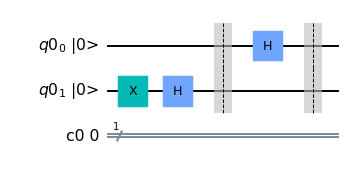

<IPython.core.display.Latex object>

In [4]:
# prepration of state |-> in order to use phaseKickbacked effect (Ancila qubit)
qc.x(q[1])
qc.h(q[1])
qc.barrier()

# Make a superposition of main qubit
qc.h(q[0])
qc.barrier()
display(cplot(qc),splot(qc))

## Build a random function

### Constant function
1. $ f(0)=f(1)=0 $ 

2. $ f(0)=f(1)=1 $

###  Balanced function 
3. $f(0)=0$ and $f(1)=1 $

4. $f(0)=1$ and $f(1)=0 $

## How can we build Deutsch function in Qiskit?

Official definition of $U_{f(x)}$ is the following equation:

$$U_f|x\rangle|y\rangle=|x\rangle|y \oplus	f(x)\rangle$$

How we can implement this general unitary function by using the quantum gates?

Let me consider $4$ above functions:

## First function


#### $ f(0)=f(1)=0 $ 

 - $U_f|00\rangle =|0\rangle|0 \oplus	f(0)\rangle=|00\rangle$,
 - $U_f|01\rangle =|0\rangle|1 \oplus	f(0)\rangle=|01\rangle$,
 - $U_f|10\rangle =|1\rangle|0 \oplus	f(1)\rangle=|10\rangle$,
 - $U_f|11\rangle =|1\rangle|1 \oplus	f(1)\rangle=|11\rangle$.
 
based on the input and output states we can see the $U_f$ is just a unitary function. But for the $2$nd case

## Second Function

#### $ f(0)=f(1)=1 $ 

 - $U_f|00\rangle =|0\rangle|0 \oplus	f(0)\rangle=|01\rangle$,
 - $U_f|01\rangle =|0\rangle|1 \oplus	f(0)\rangle=|00\rangle$,
 - $U_f|10\rangle =|1\rangle|0 \oplus	f(1)\rangle=|11\rangle$,
 - $U_f|11\rangle =|1\rangle|1 \oplus	f(1)\rangle=|10\rangle$.

## First way

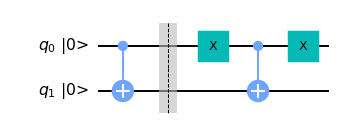

In [5]:
# we can implement $U_f$ by using two $U_CNOT$ gates. like below
Ug1 = QuantumCircuit(2)
# for states |10> and |11> 
Ug1.cx(0,1)
Ug1.barrier()

#for states |00> and |01> to |01> and |00>  
Ug1.x(0)
Ug1.cx(0,1)
Ug1.x(0)
cplot(Ug1)

### Extra hint:

We can use $U_{CNOT} (I \otimes X)$ rather than $(X\otimes I) U_{CNOT} (X\otimes I)$. In the following you can see the circuit of this alternative gate

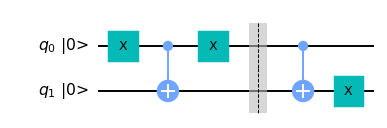

In [6]:
# we can implement $U_f$ by using two $U_CNOT$ gates. like below
Ug1_alter = QuantumCircuit(2)
#for states |00> and |01> to |01> and |00>  
Ug1_alter.x(0)
Ug1_alter.cx(0,1)
Ug1_alter.x(0)
Ug1_alter.barrier()

# its alternative is

Ug1_alter.cx(0,1)
Ug1_alter.x(1)
cplot(Ug1_alter)


## Second way

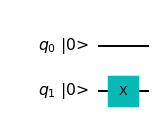

In [7]:
# Second way is just using the x gate for the second qubit. Please check inputs and outputs
Ug2 = QuantumCircuit(2)
Ug2.x(1)
cplot(Ug2)

### Third functin 

#### $ f(0)=0$ and $f(1)=1 $ 

 - $U_f|00\rangle =|0\rangle|0 \oplus	f(0)\rangle=|00\rangle$,
 - $U_f|01\rangle =|0\rangle|1 \oplus	f(0)\rangle=|01\rangle$,
 - $U_f|10\rangle =|1\rangle|0 \oplus	f(1)\rangle=|11\rangle$,
 - $U_f|11\rangle =|1\rangle|1 \oplus	f(1)\rangle=|10\rangle$.

this is exactly equal to use of $U_{CNOT}$.

## Fourth Function

#### $ f(0)=1$ and $f(1)=0 $ 

 - $U_f|00\rangle =|0\rangle|0 \oplus	f(0)\rangle=|01\rangle$,
 - $U_f|01\rangle =|0\rangle|1 \oplus	f(0)\rangle=|00\rangle$,
 - $U_f|10\rangle =|1\rangle|0 \oplus	f(1)\rangle=|10\rangle$,
 - $U_f|11\rangle =|1\rangle|1 \oplus	f(1)\rangle=|11\rangle$.

this is exactly equal to use of $(X\otimes I) U_{CNOT} (X\otimes I)$ 

## The following cell create a random 'Constant' or 'Balanced' function

In [8]:
import random as rm
import numpy as np

In [9]:
# This cell make
def func():
    f = []        # list 
    k = ['b','c'] # b(c) denotes Balanced(Constant) 
    decide = rm.choice(k)
    if decide == 'c':
        a = rm.randint(0,1)
        for i in range(2):
            f.append(a)
    else:
        a = rm.randint(0,1)
        f.append(a)
        if a == 0:
            f.append(1)
        else:
            f.append(0)
    return f

In [10]:
f = func()
f

[0, 1]

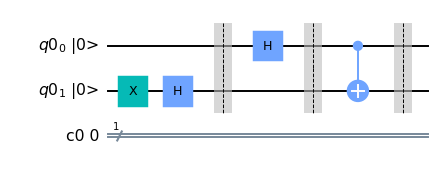

<IPython.core.display.Latex object>

In [11]:
for i in range(2):
    if f[i] == 1 and i != 1:
        qc.x([0])
        qc.cx([0],[1])
        qc.x([0])
    elif f[i] == 1 and i == 1:
        qc.cx([0],[1])

qc.barrier()
display(cplot(qc),splot(qc))

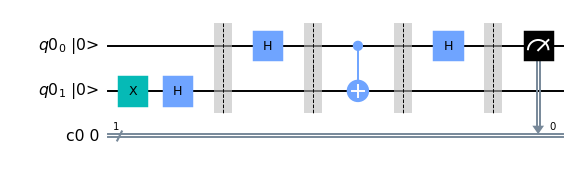

In [12]:
qc.h(q[0])
qc.barrier()
qc.measure(q[0],0)
cplot(qc)

In [13]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator

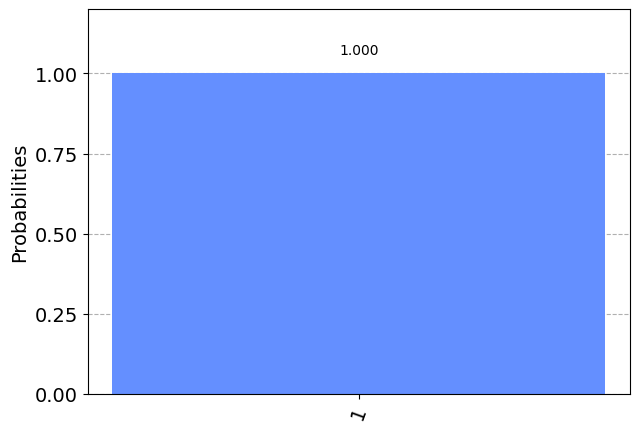

In [17]:
result = QasmSimulator().run(transpile(qc,QasmSimulator()),shots=1024).result()
count = result.get_counts()
plot_histogram(count)

In [18]:
f

[0, 1]